## Define the Convolutional Neural Network

After you've looked at the data you're working with and, in this case, know the shapes of the images and of the keypoints, you are ready to define a convolutional neural network that can *learn* from this data.

In this notebook and in `models.py`, you will:
1. Define a CNN with images as input and keypoints as output
2. Construct the transformed FaceKeypointsDataset, just as before
3. Train the CNN on the training data, tracking loss
4. See how the trained model performs on test data
5. If necessary, modify the CNN structure and model hyperparameters, so that it performs *well* **\***

**\*** What does *well* mean?

"Well" means that the model's loss decreases during training **and**, when applied to test image data, the model produces keypoints that closely match the true keypoints of each face. And you'll see examples of this later in the notebook.

---


## CNN Architecture

Recall that CNN's are defined by a few types of layers:
* Convolutional layers
* Maxpooling layers
* Fully-connected layers

You are required to use the above layers and encouraged to add multiple convolutional layers and things like dropout layers that may prevent overfitting. You are also encouraged to look at literature on keypoint detection, such as [this paper](https://arxiv.org/pdf/1710.00977.pdf), to help you determine the structure of your network.


### TODO: Define your model in the provided file `models.py` file

This file is mostly empty but contains the expected name and some TODO's for creating your model.

---

## PyTorch Neural Nets

To define a neural network in PyTorch, you define the layers of a model in the function `__init__` and define the feedforward behavior of a network that employs those initialized layers in the function `forward`, which takes in an input image tensor, `x`. The structure of this Net class is shown below and left for you to fill in.

Note: During training, PyTorch will be able to perform backpropagation by keeping track of the network's feedforward behavior and using autograd to calculate the update to the weights in the network.

#### Define the Layers in ` __init__`
As a reminder, a conv/pool layer may be defined like this (in `__init__`):
```
# 1 input image channel (for grayscale images), 32 output channels/feature maps, 3x3 square convolution kernel
self.conv1 = nn.Conv2d(1, 32, 3)

# maxpool that uses a square window of kernel_size=2, stride=2
self.pool = nn.MaxPool2d(2, 2)      
```

#### Refer to Layers in `forward`
Then referred to in the `forward` function like this, in which the conv1 layer has a ReLu activation applied to it before maxpooling is applied:
```
x = self.pool(F.relu(self.conv1(x)))
```

Best practice is to place any layers whose weights will change during the training process in `__init__` and refer to them in the `forward` function; any layers or functions that always behave in the same way, such as a pre-defined activation function, should appear *only* in the `forward` function.

#### Why models.py

You are tasked with defining the network in the `models.py` file so that any models you define can be saved and loaded by name in different notebooks in this project directory. For example, by defining a CNN class called `Net` in `models.py`, you can then create that same architecture in this and other notebooks by simply importing the class and instantiating a model:
```
    from models import Net
    net = Net()
```

In [9]:
# import the usual resources
import matplotlib.pyplot as plt
import numpy as np

# watch for any changes in model.py, if it changes, re-load it automatically
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
## TODO: Define the Net in models.py

import torch
import torch.nn as nn
import torch.nn.functional as F

## TODO: Once you've define the network, you can instantiate it
# one example conv layer has been provided for you
from models import Net

net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(4, 4), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(2, 2), stride=(1, 1))
  (conv4): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout(p=0.1)
  (dropout2): Dropout(p=0.2)
  (dropout3): Dropout(p=0.3)
  (dropout4): Dropout(p=0.4)
  (dropout5): Dropout(p=0.5)
  (dropout6): Dropout(p=0.6)
  (fc1): Linear(in_features=43264, out_features=2000, bias=True)
  (fc2): Linear(in_features=2000, out_features=136, bias=True)
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (b

## Transform the dataset 

To prepare for training, create a transformed dataset of images and keypoints.

### TODO: Define a data transform

In PyTorch, a convolutional neural network expects a torch image of a consistent size as input. For efficient training, and so your model's loss does not blow up during training, it is also suggested that you normalize the input images and keypoints. The necessary transforms have been defined in `data_load.py` and you **do not** need to modify these; take a look at this file (you'll see the same transforms that were defined and applied in Notebook 1).

To define the data transform below, use a [composition](http://pytorch.org/tutorials/beginner/data_loading_tutorial.html#compose-transforms) of:
1. Rescaling and/or cropping the data, such that you are left with a square image (the suggested size is 224x224px)
2. Normalizing the images and keypoints; turning each RGB image into a grayscale image with a color range of [0, 1] and transforming the given keypoints into a range of [-1, 1]
3. Turning these images and keypoints into Tensors

These transformations have been defined in `data_load.py`, but it's up to you to call them and create a `data_transform` below. **This transform will be applied to the training data and, later, the test data**. It will change how you go about displaying these images and keypoints, but these steps are essential for efficient training.

As a note, should you want to perform data augmentation (which is optional in this project), and randomly rotate or shift these images, a square image size will be useful; rotating a 224x224 image by 90 degrees will result in the same shape of output.

In [11]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

# the dataset we created in Notebook 1 is copied in the helper file `data_load.py`
from data_load import FacialKeypointsDataset
# the transforms we defined in Notebook 1 are in the helper file `data_load.py`
from data_load import Rescale, RandomCrop, Normalize, ToTensor


## TODO: define the data_transform using transforms.Compose([all tx's, . , .])
# order matters! i.e. rescaling should come before a smaller crop
data_transform = transforms.Compose([Rescale((250, 250)),RandomCrop((224, 224)), Normalize(), ToTensor()])
#data_transform = transforms.Compose([Rescale((227, 227)), Normalize(), ToTensor()])
# testing that you've defined a transform
assert(data_transform is not None), 'Define a data_transform'

In [12]:
# create the transformed dataset
transformed_dataset = FacialKeypointsDataset(csv_file='data/training_frames_keypoints.csv',
                                             root_dir='data/training/',
                                             transform=data_transform)


print('Number of images: ', len(transformed_dataset))

# iterate through the transformed dataset and print some stats about the first few samples
for i in range(4):
    sample = transformed_dataset[i]
    print(i, sample['image'].size(), sample['keypoints'].size())

Number of images:  3462
0 torch.Size([1, 224, 224]) torch.Size([68, 2])
1 torch.Size([1, 224, 224]) torch.Size([68, 2])
2 torch.Size([1, 224, 224]) torch.Size([68, 2])
3 torch.Size([1, 224, 224]) torch.Size([68, 2])


/home/akashc/code/udaciyt_cv/P1_Facial_Keypoints/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


## Batching and loading data

Next, having defined the transformed dataset, we can use PyTorch's DataLoader class to load the training data in batches of whatever size as well as to shuffle the data for training the model. You can read more about the parameters of the DataLoader, in [this documentation](http://pytorch.org/docs/master/data.html).

#### Batch size
Decide on a good batch size for training your model. Try both small and large batch sizes and note how the loss decreases as the model trains.

**Note for Windows users**: Please change the `num_workers` to 0 or you may face some issues with your DataLoader failing.

In [13]:
# load training data in batches
batch_size = 10

train_loader = DataLoader(transformed_dataset, 
                          batch_size=batch_size,
                          shuffle=True, 
                          num_workers=4)


## Before training

Take a look at how this model performs before it trains. You should see that the keypoints it predicts start off in one spot and don't match the keypoints on a face at all! It's interesting to visualize this behavior so that you can compare it to the model after training and see how the model has improved.

#### Load in the test dataset

The test dataset is one that this model has *not* seen before, meaning it has not trained with these images. We'll load in this test data and before and after training, see how your model performs on this set!

To visualize this test data, we have to go through some un-transformation steps to turn our images into python images from tensors and to turn our keypoints back into a recognizable range. 

In [17]:
# load in the test data, using the dataset class
# AND apply the data_transform you defined above

# create the test dataset
test_dataset = FacialKeypointsDataset(csv_file='data/test_frames_keypoints.csv',
                                             root_dir='data/test/',
                                             transform=data_transform)



In [18]:
# load test data in batches
batch_size = 10

test_loader = DataLoader(test_dataset, 
                          batch_size=batch_size,
                          shuffle=True, 
                          num_workers=4)

## Apply the model on a test sample

To test the model on a test sample of data, you have to follow these steps:
1. Extract the image and ground truth keypoints from a sample
2. Make sure the image is a FloatTensor, which the model expects.
3. Forward pass the image through the net to get the predicted, output keypoints.

This function test how the network performs on the first batch of test data. It returns the images, the transformed images, the predicted keypoints (produced by the model), and the ground truth keypoints.

In [19]:
# test the model on a batch of test images

def net_sample_output():
    
    # iterate through the test dataset
    for i, sample in enumerate(test_loader):
        
        # get sample data: images and ground truth keypoints
        images = sample['image']
        key_pts = sample['keypoints']

        # convert images to FloatTensors
        images = images.type(torch.FloatTensor)

        # forward pass to get net output
        output_pts = net(images)
        
        # reshape to batch_size x 68 x 2 pts
        output_pts = output_pts.view(output_pts.size()[0], 68, -1)
        
        # break after first image is tested
        if i == 0:
            return images, output_pts, key_pts
            

#### Debugging tips

If you get a size or dimension error here, make sure that your network outputs the expected number of keypoints! Or if you get a Tensor type error, look into changing the above code that casts the data into float types: `images = images.type(torch.FloatTensor)`.

In [20]:
# call the above function
# returns: test images, test predicted keypoints, test ground truth keypoints
test_images, test_outputs, gt_pts = net_sample_output()

# print out the dimensions of the data to see if they make sense
print(test_images.data.size())
print(test_outputs.data.size())
print(gt_pts.size())

/home/akashc/code/udaciyt_cv/P1_Facial_Keypoints/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/akashc/code/udaciyt_cv/P1_Facial_Keypoints/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/akashc/code/udaciyt_cv/P1_Facial_Keypoints/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/akashc/code/udaciyt_cv/P1_Facial_Keypoints/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


torch.Size([10, 1, 224, 224])
torch.Size([10, 68, 2])
torch.Size([10, 68, 2])


## Visualize the predicted keypoints

Once we've had the model produce some predicted output keypoints, we can visualize these points in a way that's similar to how we've displayed this data before, only this time, we have to "un-transform" the image/keypoint data to display it.

Note that I've defined a *new* function, `show_all_keypoints` that displays a grayscale image, its predicted keypoints and its ground truth keypoints (if provided).

In [10]:
def show_all_keypoints(image, predicted_key_pts, gt_pts=None):
    """Show image with predicted keypoints"""
    # image is grayscale
    plt.imshow(image, cmap='gray')
    plt.scatter(predicted_key_pts[:, 0], predicted_key_pts[:, 1], s=20, marker='.', c='m')
    # plot ground truth points as green pts
    if gt_pts is not None:
        plt.scatter(gt_pts[:, 0], gt_pts[:, 1], s=20, marker='.', c='g')


#### Un-transformation

Next, you'll see a helper function. `visualize_output` that takes in a batch of images, predicted keypoints, and ground truth keypoints and displays a set of those images and their true/predicted keypoints.

This function's main role is to take batches of image and keypoint data (the input and output of your CNN), and transform them into numpy images and un-normalized keypoints (x, y) for normal display. The un-transformation process turns keypoints and images into numpy arrays from Tensors *and* it undoes the keypoint normalization done in the Normalize() transform; it's assumed that you applied these transformations when you loaded your test data.

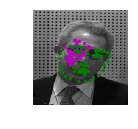

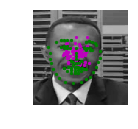

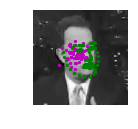

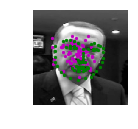

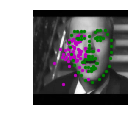

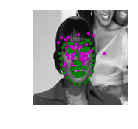

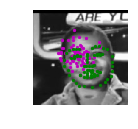

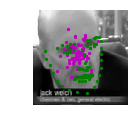

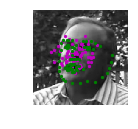

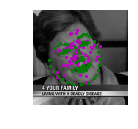

In [11]:
# visualize the output
# by default this shows a batch of 10 images
def visualize_output(test_images, test_outputs, gt_pts=None, batch_size=10):

    for i in range(batch_size):
        plt.figure(figsize=(20,10))
        ax = plt.subplot(1, batch_size, i+1)

        # un-transform the image data
        image = test_images[i].data   # get the image from it's wrapper
        image = image.numpy()   # convert to numpy array from a Tensor
        image = np.transpose(image, (1, 2, 0))   # transpose to go from torch to numpy image

        # un-transform the predicted key_pts data
        predicted_key_pts = test_outputs[i].data
        predicted_key_pts = predicted_key_pts.numpy()
        # undo normalization of keypoints  
        predicted_key_pts = predicted_key_pts*50.0+100
        
        # plot ground truth points for comparison, if they exist
        ground_truth_pts = None
        if gt_pts is not None:
            ground_truth_pts = gt_pts[i]         
            ground_truth_pts = ground_truth_pts*50.0+100
        
        # call show_all_keypoints
        show_all_keypoints(np.squeeze(image), predicted_key_pts, ground_truth_pts)
            
        plt.axis('off')

    plt.show()
    
# call it
visualize_output(test_images, test_outputs, gt_pts)

## Training

#### Loss function
Training a network to predict keypoints is different than training a network to predict a class; instead of outputting a distribution of classes and using cross entropy loss, you may want to choose a loss function that is suited for regression, which directly compares a predicted value and target value. Read about the various kinds of loss functions (like MSE or L1/SmoothL1 loss) in [this documentation](http://pytorch.org/docs/master/_modules/torch/nn/modules/loss.html).

### TODO: Define the loss and optimization

Next, you'll define how the model will train by deciding on the loss function and optimizer.

---

In [12]:
## TODO: Define the loss and optimization
import torch.optim as optim

criterion = nn.MSELoss()

optimizer = optim.Adam(net.parameters(), lr=0.001)


## Training and Initial Observation

Now, you'll train on your batched training data from `train_loader` for a number of epochs. 

To quickly observe how your model is training and decide on whether or not you should modify it's structure or hyperparameters, you're encouraged to start off with just one or two epochs at first. As you train, note how your the model's loss behaves over time: does it decrease quickly at first and then slow down? Does it take a while to decrease in the first place? What happens if you change the batch size of your training data or modify your loss function? etc. 

Use these initial observations to make changes to your model and decide on the best architecture before you train for many epochs and create a final model.

In [13]:
def train_net(n_epochs):

    # prepare the net for training
    net.train()

    for epoch in range(n_epochs):  # loop over the dataset multiple times
        
        running_loss = 0.0

        # train on batches of data, assumes you already have train_loader
        for batch_i, data in enumerate(train_loader):
            # get the input images and their corresponding labels
            images = data['image']
            key_pts = data['keypoints']

            # flatten pts
            key_pts = key_pts.view(key_pts.size(0), -1)

            # convert variables to floats for regression loss
            key_pts = key_pts.type(torch.FloatTensor)
            images = images.type(torch.FloatTensor)

            # forward pass to get outputs
            output_pts = net(images)

            # calculate the loss between predicted and target keypoints
            loss = criterion(output_pts, key_pts)

            # zero the parameter (weight) gradients
            optimizer.zero_grad()
            
            # backward pass to calculate the weight gradients
            loss.backward()

            # update the weights
            optimizer.step()

            # print loss statistics
            # to convert loss into a scalar and add it to the running_loss, use .item()
            running_loss += loss.item()
            if batch_i % 10 == 9:    # print every 10 batches
                print('Epoch: {}, Batch: {}, Avg. Loss: {}'.format(epoch + 1, batch_i+1, running_loss/1000))
                running_loss = 0.0

    print('Finished Training')


In [14]:
# train your network
n_epochs = 10 # start small, and increase when you've decided on your model structure and hyperparams

train_net(n_epochs)

/home/akashc/code/udaciyt_cv/P1_Facial_Keypoints/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/akashc/code/udaciyt_cv/P1_Facial_Keypoints/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/akashc/code/udaciyt_cv/P1_Facial_Keypoints/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/akashc/code/udaciyt_cv/P1_Facial_Keypoints/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 1, Batch: 10, Avg. Loss: 0.010717299461364746
Epoch: 1, Batch: 20, Avg. Loss: 0.009307411849498749
Epoch: 1, Batch: 30, Avg. Loss: 0.008324223607778548
Epoch: 1, Batch: 40, Avg. Loss: 0.006548315942287445
Epoch: 1, Batch: 50, Avg. Loss: 0.003961579531431198
Epoch: 1, Batch: 60, Avg. Loss: 0.0037273251414299013
Epoch: 1, Batch: 70, Avg. Loss: 0.003400810360908508
Epoch: 1, Batch: 80, Avg. Loss: 0.0025960739701986315
Epoch: 1, Batch: 90, Avg. Loss: 0.002583955630660057
Epoch: 1, Batch: 100, Avg. Loss: 0.00222465617954731
Epoch: 1, Batch: 110, Avg. Loss: 0.00226386322081089
Epoch: 1, Batch: 120, Avg. Loss: 0.0020016672611236574
Epoch: 1, Batch: 130, Avg. Loss: 0.0018437834829092025
Epoch: 1, Batch: 140, Avg. Loss: 0.0019620368257164955
Epoch: 1, Batch: 150, Avg. Loss: 0.0018970778584480286
Epoch: 1, Batch: 160, Avg. Loss: 0.0017963484898209571
Epoch: 1, Batch: 170, Avg. Loss: 0.001985401511192322
Epoch: 1, Batch: 180, Avg. Loss: 0.0017032375335693359
Epoch: 1, Batch: 190, Avg. Loss

/home/akashc/code/udaciyt_cv/P1_Facial_Keypoints/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/akashc/code/udaciyt_cv/P1_Facial_Keypoints/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/akashc/code/udaciyt_cv/P1_Facial_Keypoints/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/akashc/code/udaciyt_cv/P1_Facial_Keypoints/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 2, Batch: 10, Avg. Loss: 0.001627796769142151
Epoch: 2, Batch: 20, Avg. Loss: 0.001617024317383766
Epoch: 2, Batch: 30, Avg. Loss: 0.001505189910531044
Epoch: 2, Batch: 40, Avg. Loss: 0.0014774728864431382
Epoch: 2, Batch: 50, Avg. Loss: 0.0012520200684666633
Epoch: 2, Batch: 60, Avg. Loss: 0.0014631574526429176
Epoch: 2, Batch: 70, Avg. Loss: 0.0016067857295274735
Epoch: 2, Batch: 80, Avg. Loss: 0.0012677025571465493
Epoch: 2, Batch: 90, Avg. Loss: 0.0016449273973703385
Epoch: 2, Batch: 100, Avg. Loss: 0.0014183790311217308
Epoch: 2, Batch: 110, Avg. Loss: 0.001124842956662178
Epoch: 2, Batch: 120, Avg. Loss: 0.0012873798683285713
Epoch: 2, Batch: 130, Avg. Loss: 0.0013098062351346016
Epoch: 2, Batch: 140, Avg. Loss: 0.0014241333976387977
Epoch: 2, Batch: 150, Avg. Loss: 0.0012186264842748641
Epoch: 2, Batch: 160, Avg. Loss: 0.0014409063458442688
Epoch: 2, Batch: 170, Avg. Loss: 0.001357402116060257
Epoch: 2, Batch: 180, Avg. Loss: 0.001534543789923191
Epoch: 2, Batch: 190, Avg

/home/akashc/code/udaciyt_cv/P1_Facial_Keypoints/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/akashc/code/udaciyt_cv/P1_Facial_Keypoints/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/akashc/code/udaciyt_cv/P1_Facial_Keypoints/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/akashc/code/udaciyt_cv/P1_Facial_Keypoints/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 3, Batch: 10, Avg. Loss: 0.0010702439844608306
Epoch: 3, Batch: 20, Avg. Loss: 0.0013005740121006966
Epoch: 3, Batch: 30, Avg. Loss: 0.0010292982645332812
Epoch: 3, Batch: 40, Avg. Loss: 0.0010564055144786835
Epoch: 3, Batch: 50, Avg. Loss: 0.0013139987885951996
Epoch: 3, Batch: 60, Avg. Loss: 0.0011700410917401315
Epoch: 3, Batch: 70, Avg. Loss: 0.0013376453518867493
Epoch: 3, Batch: 80, Avg. Loss: 0.001356167010962963
Epoch: 3, Batch: 90, Avg. Loss: 0.001309697709977627
Epoch: 3, Batch: 100, Avg. Loss: 0.0012221733927726746
Epoch: 3, Batch: 110, Avg. Loss: 0.0010641579777002335
Epoch: 3, Batch: 120, Avg. Loss: 0.0011429077461361885
Epoch: 3, Batch: 130, Avg. Loss: 0.0011617837846279145
Epoch: 3, Batch: 140, Avg. Loss: 0.0010819649137556553
Epoch: 3, Batch: 150, Avg. Loss: 0.0010125157497823238
Epoch: 3, Batch: 160, Avg. Loss: 0.0010455461293458939
Epoch: 3, Batch: 170, Avg. Loss: 0.0008544234707951546
Epoch: 3, Batch: 180, Avg. Loss: 0.001130958877503872
Epoch: 3, Batch: 190, 

/home/akashc/code/udaciyt_cv/P1_Facial_Keypoints/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/akashc/code/udaciyt_cv/P1_Facial_Keypoints/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/akashc/code/udaciyt_cv/P1_Facial_Keypoints/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/akashc/code/udaciyt_cv/P1_Facial_Keypoints/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 4, Batch: 10, Avg. Loss: 0.0010240305438637735
Epoch: 4, Batch: 20, Avg. Loss: 0.0009722996726632118
Epoch: 4, Batch: 30, Avg. Loss: 0.000987702928483486
Epoch: 4, Batch: 40, Avg. Loss: 0.0010766041800379753
Epoch: 4, Batch: 50, Avg. Loss: 0.0008855308331549167
Epoch: 4, Batch: 60, Avg. Loss: 0.0010332811251282691
Epoch: 4, Batch: 70, Avg. Loss: 0.001254305511713028
Epoch: 4, Batch: 80, Avg. Loss: 0.0009208392575383186
Epoch: 4, Batch: 90, Avg. Loss: 0.0009854392260313033
Epoch: 4, Batch: 100, Avg. Loss: 0.000900829341262579
Epoch: 4, Batch: 110, Avg. Loss: 0.0008391391895711422
Epoch: 4, Batch: 120, Avg. Loss: 0.0009606104493141175
Epoch: 4, Batch: 130, Avg. Loss: 0.0010121674090623855
Epoch: 4, Batch: 140, Avg. Loss: 0.000941884733736515
Epoch: 4, Batch: 150, Avg. Loss: 0.0009499368965625763
Epoch: 4, Batch: 160, Avg. Loss: 0.0010077312886714936
Epoch: 4, Batch: 170, Avg. Loss: 0.0007738508395850658
Epoch: 4, Batch: 180, Avg. Loss: 0.000990265518426895
Epoch: 4, Batch: 190, Av

/home/akashc/code/udaciyt_cv/P1_Facial_Keypoints/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/akashc/code/udaciyt_cv/P1_Facial_Keypoints/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/akashc/code/udaciyt_cv/P1_Facial_Keypoints/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/akashc/code/udaciyt_cv/P1_Facial_Keypoints/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 5, Batch: 10, Avg. Loss: 0.000926144752651453
Epoch: 5, Batch: 20, Avg. Loss: 0.000743652381002903
Epoch: 5, Batch: 30, Avg. Loss: 0.0008469414114952087
Epoch: 5, Batch: 40, Avg. Loss: 0.0008910777792334556
Epoch: 5, Batch: 50, Avg. Loss: 0.0008316664919257164
Epoch: 5, Batch: 60, Avg. Loss: 0.0010318500027060508
Epoch: 5, Batch: 70, Avg. Loss: 0.0009412770010530949
Epoch: 5, Batch: 80, Avg. Loss: 0.0007549124732613564
Epoch: 5, Batch: 90, Avg. Loss: 0.0008448262587189674
Epoch: 5, Batch: 100, Avg. Loss: 0.0007455493025481701
Epoch: 5, Batch: 110, Avg. Loss: 0.0007345263957977295
Epoch: 5, Batch: 120, Avg. Loss: 0.0008891490772366524
Epoch: 5, Batch: 130, Avg. Loss: 0.000669073186814785
Epoch: 5, Batch: 140, Avg. Loss: 0.0009153445549309253
Epoch: 5, Batch: 150, Avg. Loss: 0.0008012438900768757
Epoch: 5, Batch: 160, Avg. Loss: 0.0008254912383854389
Epoch: 5, Batch: 170, Avg. Loss: 0.0007448245920240879
Epoch: 5, Batch: 180, Avg. Loss: 0.0006962934583425522
Epoch: 5, Batch: 190, 

/home/akashc/code/udaciyt_cv/P1_Facial_Keypoints/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/akashc/code/udaciyt_cv/P1_Facial_Keypoints/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/akashc/code/udaciyt_cv/P1_Facial_Keypoints/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/akashc/code/udaciyt_cv/P1_Facial_Keypoints/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 6, Batch: 10, Avg. Loss: 0.000673914149403572
Epoch: 6, Batch: 20, Avg. Loss: 0.0007922791093587876
Epoch: 6, Batch: 30, Avg. Loss: 0.0007400383241474628
Epoch: 6, Batch: 40, Avg. Loss: 0.0008837468698620796
Epoch: 6, Batch: 50, Avg. Loss: 0.0008328901864588261
Epoch: 6, Batch: 60, Avg. Loss: 0.0008966698534786701
Epoch: 6, Batch: 70, Avg. Loss: 0.000810753121972084
Epoch: 6, Batch: 80, Avg. Loss: 0.0006752132307738066
Epoch: 6, Batch: 90, Avg. Loss: 0.0007981684170663357
Epoch: 6, Batch: 100, Avg. Loss: 0.0007378488592803479
Epoch: 6, Batch: 110, Avg. Loss: 0.0009046226106584072
Epoch: 6, Batch: 120, Avg. Loss: 0.0007929204404354095
Epoch: 6, Batch: 130, Avg. Loss: 0.0007339739240705967
Epoch: 6, Batch: 140, Avg. Loss: 0.0006981898210942745
Epoch: 6, Batch: 150, Avg. Loss: 0.0008191789612174035
Epoch: 6, Batch: 160, Avg. Loss: 0.0008172072544693947
Epoch: 6, Batch: 170, Avg. Loss: 0.0008743139281868935
Epoch: 6, Batch: 180, Avg. Loss: 0.0009050517156720161
Epoch: 6, Batch: 190,

/home/akashc/code/udaciyt_cv/P1_Facial_Keypoints/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/akashc/code/udaciyt_cv/P1_Facial_Keypoints/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/akashc/code/udaciyt_cv/P1_Facial_Keypoints/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/akashc/code/udaciyt_cv/P1_Facial_Keypoints/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 7, Batch: 10, Avg. Loss: 0.0007372703403234482
Epoch: 7, Batch: 20, Avg. Loss: 0.000678532712161541
Epoch: 7, Batch: 30, Avg. Loss: 0.000682445328682661
Epoch: 7, Batch: 40, Avg. Loss: 0.0005927499942481517
Epoch: 7, Batch: 50, Avg. Loss: 0.0008402013033628464
Epoch: 7, Batch: 60, Avg. Loss: 0.0007456447258591652
Epoch: 7, Batch: 70, Avg. Loss: 0.0007820883393287658
Epoch: 7, Batch: 80, Avg. Loss: 0.0006563807465136051
Epoch: 7, Batch: 90, Avg. Loss: 0.0007616279348731041
Epoch: 7, Batch: 100, Avg. Loss: 0.000607355248183012
Epoch: 7, Batch: 110, Avg. Loss: 0.0007804758213460445
Epoch: 7, Batch: 120, Avg. Loss: 0.000937496680766344
Epoch: 7, Batch: 130, Avg. Loss: 0.0007827241607010364
Epoch: 7, Batch: 140, Avg. Loss: 0.0008183708451688289
Epoch: 7, Batch: 150, Avg. Loss: 0.000749255046248436
Epoch: 7, Batch: 160, Avg. Loss: 0.0009289783835411072
Epoch: 7, Batch: 170, Avg. Loss: 0.0007929265238344669
Epoch: 7, Batch: 180, Avg. Loss: 0.0007666691578924656
Epoch: 7, Batch: 190, Av

/home/akashc/code/udaciyt_cv/P1_Facial_Keypoints/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/akashc/code/udaciyt_cv/P1_Facial_Keypoints/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/akashc/code/udaciyt_cv/P1_Facial_Keypoints/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/akashc/code/udaciyt_cv/P1_Facial_Keypoints/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 8, Batch: 10, Avg. Loss: 0.0006770456805825233
Epoch: 8, Batch: 20, Avg. Loss: 0.0007016670517623425
Epoch: 8, Batch: 30, Avg. Loss: 0.0007338186092674732
Epoch: 8, Batch: 40, Avg. Loss: 0.0006646786779165268
Epoch: 8, Batch: 50, Avg. Loss: 0.0007246382050216198
Epoch: 8, Batch: 60, Avg. Loss: 0.0006084214709699154
Epoch: 8, Batch: 70, Avg. Loss: 0.0007559771575033665
Epoch: 8, Batch: 80, Avg. Loss: 0.000900373425334692
Epoch: 8, Batch: 90, Avg. Loss: 0.0008141645938158035
Epoch: 8, Batch: 100, Avg. Loss: 0.0006013837531208992
Epoch: 8, Batch: 110, Avg. Loss: 0.000666714571416378
Epoch: 8, Batch: 120, Avg. Loss: 0.000750527247786522
Epoch: 8, Batch: 130, Avg. Loss: 0.0006831468902528286
Epoch: 8, Batch: 140, Avg. Loss: 0.0005864563286304474
Epoch: 8, Batch: 150, Avg. Loss: 0.0008302034325897694
Epoch: 8, Batch: 160, Avg. Loss: 0.0006383049190044403
Epoch: 8, Batch: 170, Avg. Loss: 0.0006672981157898902
Epoch: 8, Batch: 180, Avg. Loss: 0.0006569982878863812
Epoch: 8, Batch: 190, 

/home/akashc/code/udaciyt_cv/P1_Facial_Keypoints/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/akashc/code/udaciyt_cv/P1_Facial_Keypoints/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/akashc/code/udaciyt_cv/P1_Facial_Keypoints/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/akashc/code/udaciyt_cv/P1_Facial_Keypoints/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 9, Batch: 10, Avg. Loss: 0.0008244429230690002
Epoch: 9, Batch: 20, Avg. Loss: 0.0008148125447332859
Epoch: 9, Batch: 30, Avg. Loss: 0.0008276690393686294
Epoch: 9, Batch: 40, Avg. Loss: 0.0007221146114170552
Epoch: 9, Batch: 50, Avg. Loss: 0.0007903598994016647
Epoch: 9, Batch: 60, Avg. Loss: 0.0006986957043409348
Epoch: 9, Batch: 70, Avg. Loss: 0.000722829669713974
Epoch: 9, Batch: 80, Avg. Loss: 0.0006180110350251198
Epoch: 9, Batch: 90, Avg. Loss: 0.0007182371132075787
Epoch: 9, Batch: 100, Avg. Loss: 0.0007470642775297165
Epoch: 9, Batch: 110, Avg. Loss: 0.0005495412983000279
Epoch: 9, Batch: 120, Avg. Loss: 0.0008261457420885563
Epoch: 9, Batch: 130, Avg. Loss: 0.0007253732122480869
Epoch: 9, Batch: 140, Avg. Loss: 0.0008082588799297809
Epoch: 9, Batch: 150, Avg. Loss: 0.0007624320574104786
Epoch: 9, Batch: 160, Avg. Loss: 0.0007212323397397995
Epoch: 9, Batch: 170, Avg. Loss: 0.0006875739693641662
Epoch: 9, Batch: 180, Avg. Loss: 0.0008280010186135769
Epoch: 9, Batch: 190

/home/akashc/code/udaciyt_cv/P1_Facial_Keypoints/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/akashc/code/udaciyt_cv/P1_Facial_Keypoints/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/akashc/code/udaciyt_cv/P1_Facial_Keypoints/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/akashc/code/udaciyt_cv/P1_Facial_Keypoints/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 10, Batch: 10, Avg. Loss: 0.0006763520091772079
Epoch: 10, Batch: 20, Avg. Loss: 0.0008337646462023258
Epoch: 10, Batch: 30, Avg. Loss: 0.0006892607323825359
Epoch: 10, Batch: 40, Avg. Loss: 0.0006566542573273182
Epoch: 10, Batch: 50, Avg. Loss: 0.0007157501243054867
Epoch: 10, Batch: 60, Avg. Loss: 0.0007085228003561497
Epoch: 10, Batch: 70, Avg. Loss: 0.000618163887411356
Epoch: 10, Batch: 80, Avg. Loss: 0.0007797157317399979
Epoch: 10, Batch: 90, Avg. Loss: 0.0006967455856502057
Epoch: 10, Batch: 100, Avg. Loss: 0.00060669706761837
Epoch: 10, Batch: 110, Avg. Loss: 0.0006847124733030796
Epoch: 10, Batch: 120, Avg. Loss: 0.000750123105943203
Epoch: 10, Batch: 130, Avg. Loss: 0.0006324348412454128
Epoch: 10, Batch: 140, Avg. Loss: 0.0008412400968372822
Epoch: 10, Batch: 150, Avg. Loss: 0.0007647263146936894
Epoch: 10, Batch: 160, Avg. Loss: 0.0008071165718138217
Epoch: 10, Batch: 170, Avg. Loss: 0.0006449229829013348
Epoch: 10, Batch: 180, Avg. Loss: 0.0008105035535991192
Epoch

## Test data

See how your model performs on previously unseen, test data. We've already loaded and transformed this data, similar to the training data. Next, run your trained model on these images to see what kind of keypoints are produced. You should be able to see if your model is fitting each new face it sees, if the points are distributed randomly, or if the points have actually overfitted the training data and do not generalize.

In [21]:
# get a sample of test data again
test_images, test_outputs, gt_pts = net_sample_output()

print(test_images.data.size())
print(test_outputs.data.size())
print(gt_pts.size())

/home/akashc/code/udaciyt_cv/P1_Facial_Keypoints/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/akashc/code/udaciyt_cv/P1_Facial_Keypoints/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/akashc/code/udaciyt_cv/P1_Facial_Keypoints/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/akashc/code/udaciyt_cv/P1_Facial_Keypoints/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


torch.Size([10, 1, 224, 224])
torch.Size([10, 68, 2])
torch.Size([10, 68, 2])


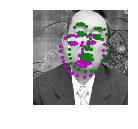

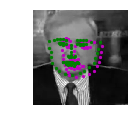

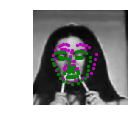

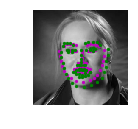

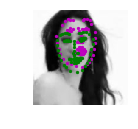

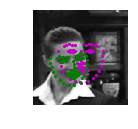

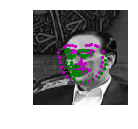

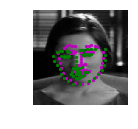

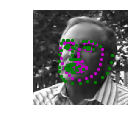

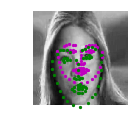

In [16]:
## TODO: visualize your test output
# you can use the same function as before, by un-commenting the line below:

visualize_output(test_images, test_outputs, gt_pts)


Once you've found a good model (or two), save your model so you can load it and use it later!

In [17]:
## TODO: change the name to something uniqe for each new model
model_dir = 'saved_models/'
model_name = 'keypoints_model_1.pt'

# after training, save your model parameters in the dir 'saved_models'
torch.save(net.state_dict(), model_dir+model_name)

In [3]:
'''
import torch
from models import Net

net = Net()
net.load_state_dict(torch.load('saved_models/keypoints_model_1.pt'))
'''

After you've trained a well-performing model, answer the following questions so that we have some insight into your training and architecture selection process. Answering all questions is required to pass this project.

### Question 1: What optimization and loss functions did you choose and why?


**Answer**: I have used Adam optimizer, as it is an extension of stochastic gradient descent, in which it considers individual adaptive learning rates for different parameters based on moments of the gradients. 

I have used Mean squared error, since it is best suited for regerssion problems like this.

### Question 2: What kind of network architecture did you start with and how did it change as you tried different architectures? Did you decide to add more convolutional layers or any layers to avoid overfitting the data?

**Answer**: I started with basic architecture from course and tweeked it bit by adding more Dropout layers and Batch normalizations

### Question 3: How did you decide on the number of epochs and batch_size to train your model?

**Answer**: As recommended I started with small epochs of 5 and batch size of 10. The final model is trained with 10 epoch 

## Feature Visualization

Sometimes, neural networks are thought of as a black box, given some input, they learn to produce some output. CNN's are actually learning to recognize a variety of spatial patterns and you can visualize what each convolutional layer has been trained to recognize by looking at the weights that make up each convolutional kernel and applying those one at a time to a sample image. This technique is called feature visualization and it's useful for understanding the inner workings of a CNN.

In the cell below, you can see how to extract a single filter (by index) from your first convolutional layer. The filter should appear as a grayscale grid.

[[ 0.1620576   0.17288722 -0.22554734 -0.19541666]
 [-0.19852148  0.07805322 -0.14717723 -0.06445817]
 [ 0.1748829  -0.11586401 -0.06289703 -0.17761885]
 [-0.12125728  0.16760533  0.21549629 -0.16250946]]
(4, 4)


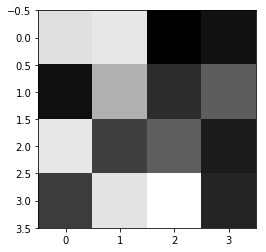

In [6]:
# Get the weights in the first conv layer, "conv1"
# if necessary, change this to reflect the name of your first conv layer
weights1 = net.conv1.weight.data

w = weights1.numpy()

filter_index = 0

print(w[filter_index][0])
print(w[filter_index][0].shape)

# display the filter weights
plt.imshow(w[filter_index][0], cmap='gray')


## Feature maps

Each CNN has at least one convolutional layer that is composed of stacked filters (also known as convolutional kernels). As a CNN trains, it learns what weights to include in it's convolutional kernels and when these kernels are applied to some input image, they produce a set of **feature maps**. So, feature maps are just sets of filtered images; they are the images produced by applying a convolutional kernel to an input image. These maps show us the features that the different layers of the neural network learn to extract. For example, you might imagine a convolutional kernel that detects the vertical edges of a face or another one that detects the corners of eyes. You can see what kind of features each of these kernels detects by applying them to an image. One such example is shown below; from the way it brings out the lines in an the image, you might characterize this as an edge detection filter.

<img src='images/feature_map_ex.png' width=50% height=50%/>


Next, choose a test image and filter it with one of the convolutional kernels in your trained CNN; look at the filtered output to get an idea what that particular kernel detects.

### TODO: Filter an image to see the effect of a convolutional kernel
---

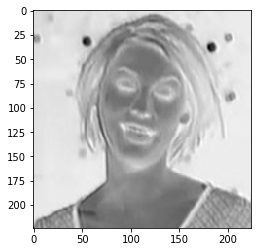

In [25]:
import cv2
img = np.squeeze(test_images[0].data.numpy())
filterImg = cv2.filter2D(img, -1, w[filter_index][0])
plt.imshow(filterImg, cmap="gray")


### Question 4: Choose one filter from your trained CNN and apply it to a test image; what purpose do you think it plays? What kind of feature do you think it detects?


**Answer**: It looks like this filter acts like a edge detector and picks up a vertical edges, this can be observed at neck region of above test image.

---
## Moving on!

Now that you've defined and trained your model (and saved the best model), you are ready to move on to the last notebook, which combines a face detector with your saved model to create a facial keypoint detection system that can predict the keypoints on *any* face in an image!

In [ ]:
## TODO: define the convolutional neural network architecture

import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
# can use the below import should you choose to initialize the weights of your Net
import torch.nn.init as I


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        
        ## TODO: Define all the layers of this CNN, the only requirements are:
        ## 1. This network takes in a square (same width and height), grayscale image as input
        ## 2. It ends with a linear layer that represents the keypoints
        ## it's suggested that you make this last layer output 136 values, 2 for each of the 68 	keypoint (x, y) pairs
        
        # As an example, you've been given a convolutional layer, which you may (but don't have 	to) change:
        # 1 input image channel (grayscale), 32 output channels/feature maps, 5x5 square 		convolution kernel
        self.conv1 = nn.Conv2d(1, 32, 5)
        self.conv2 = nn.Conv2d(32, 64, 4)
        self.conv3 = nn.Conv2d(64, 128, 3)
        self.conv4 = nn.Conv2d(128, 256, 3)
        self.conv5 = nn.Conv2d(256, 512, 3)

        self.pool = nn.MaxPool2d(2, 2)

        self.dropout1 = nn.Dropout(p=0.1)
        self.dropout2 = nn.Dropout(p=0.2)

        self.fc1 = nn.Linear(4200, 2000)
        self.fc2 = nn.Linear(2000, 136)
        

        ## Note that among the layers to add, consider including:
        # maxpooling layers, multiple conv layers, fully-connected layers, and other layers (such 		as dropout or batch normalization) to avoid overfitting
        

        
    def forward(self, x):
        ## TODO: Define the feedforward behavior of this model
        ## x is the input image and, as an example, here you may choose to include a pool/conv 		step:
        ## x = self.pool(F.relu(self.conv1(x)))

        x = self.pool(F.relu(self.conv1(x)))
        x = self.dropout1(x)

        x = self.pool(F.relu(self.conv2(x)))
        x = self.dropout2(x)

        x = self.pool(F.relu(self.conv3(x)))
        x = self.dropout1(x)

        x = self.pool(F.relu(self.conv4(x)))
        x = self.dropout2(x)

        x = self.pool(F.relu(self.conv5(x)))
        x = self.dropout2(x)


        x = x.view(x.size(0), -1)
        
       
        x = F.relu(self.fc1(x))
        x = self.fc1_drop(x)
        x = self.fc2(x)
        
        
        # a modified x, having gone through all the layers of your model, should be returned
        return x